In [173]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import numpy as np

# 1. Data Source and Contents

In [174]:
df=pd.read_csv('/Users/dftehada/Downloads/census_data.csv')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [175]:
#Define the feature and target variable columns
X = df.drop(columns=['y', 'flag'])
y = df['y']

In [176]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define the feature and target variable columns
X = df.drop(columns=['y', 'flag']).copy()  # Use .copy() to avoid modifying original df
y = df['y']

# Define features for encoding
one_hot_features = ["workclass_bin", "race_sex_bin"]
label_features = ["education_bin", "hours_per_week_bin", "msr_bin", "capital_gl_bin", "education_num_bin", "age_bin", "occupation_bin"]

# Apply Label Encoding
label_encoders = {}
for col in label_features:
    if col in X.columns:  # Ensure column exists
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])
        label_encoders[col] = encoder  # Store encoder if needed later

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=[col for col in one_hot_features if col in X.columns], drop_first=True)

# Convert only boolean one-hot encoded columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)  # Fixed issue

In [177]:
#Check encoded independent features
X

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,education_num_bin,education_bin,age_bin,workclass_bin_b. income,race_sex_bin_b. Mid,race_sex_bin_c. High
0,1,1,1,2,2,2,3,1,0,1
1,0,4,2,0,2,2,4,1,0,1
2,1,0,1,0,1,1,3,1,0,1
3,1,0,2,0,0,0,4,1,1,0
4,1,4,2,0,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,2,2,3,1,1,0
48838,1,1,0,0,1,1,2,0,1,0
48839,3,4,2,0,2,2,3,1,0,1
48840,1,1,0,2,2,2,4,1,0,1


In [178]:
#Create training and testing slices for independent features and target feature
x_train = X[df['flag'] == 'train']
y_train = y[df['flag'] == 'train']
x_test = X[df['flag'] == 'test']
y_test = y[df['flag'] == 'test']

# 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter

In [179]:
#Import Decision Tree classifier and metrics from sklearn and visualization package from matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [180]:
#Initializing model for maximum depth options
depth_accuracy_results = []
depth_precision_results = []
depth_recall_results = []
depth_f1_results = []

depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for option in depth_options:
    dtree_depth = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=40, max_features=.8, max_depth=option)
    model_depth = dtree_depth.fit(x_train, y_train)
    y_pred_depth = dtree_depth.predict(x_test)
    
    depth_accuracy = np.mean(y_test == y_pred_depth)
    depth_precision = precision_score(y_test, y_pred_depth).round(4)
    depth_recall = recall_score(y_test, y_pred_depth).round(4)
    depth_f1 = f1_score(y_test, y_pred_depth).round(4)
    
    depth_accuracy_results.append(depth_accuracy)
    depth_precision_results.append(depth_precision)
    depth_recall_results.append(depth_recall)
    depth_f1_results.append(depth_f1)

In [181]:
#Displaying performance metrics for maximum depth options
depth_results_df = pd.DataFrame({
    "Accuracy": depth_accuracy_results,
    "Precision": depth_precision_results,
    "Recall": depth_recall_results,
    "F1 Score": depth_f1_results
}, index=depth_options)

print(depth_results_df)

    Accuracy  Precision  Recall  F1 Score
2   0.821755   0.7159    0.4069   0.5189 
4   0.834961   0.7090    0.5112   0.5940 
6   0.839199   0.7516    0.4769   0.5835 
8   0.845955   0.7208    0.5679   0.6353 
10  0.843253   0.7110    0.5668   0.6308 
12  0.843499   0.7076    0.5751   0.6345 
14  0.844666   0.7154    0.5686   0.6336 
16  0.844297   0.7177    0.5619   0.6303 
18  0.842454   0.7184    0.5478   0.6216 
20  0.843437   0.7144    0.5619   0.6290 


In [182]:
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

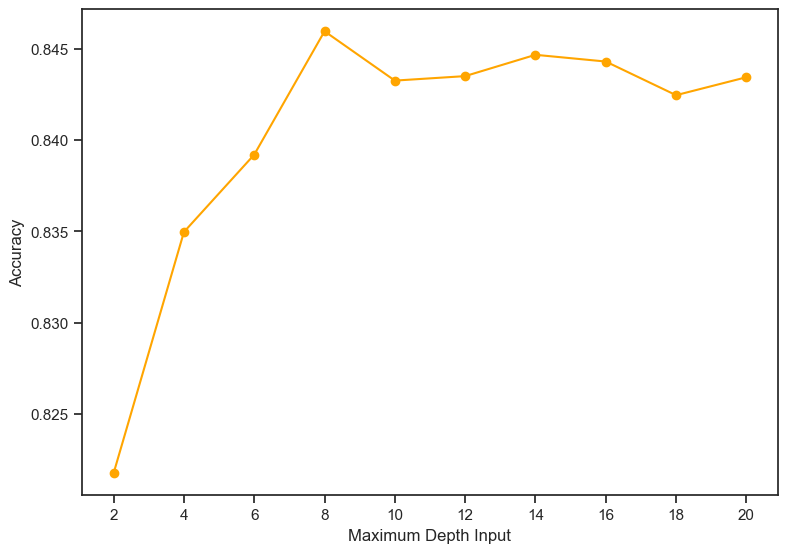

In [183]:
#Plotting accuracy scores for maximum depth options
plt.figure(figsize=(8, 6))
plt.plot(depth_options, depth_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='orange')
plt.xlabel('Maximum Depth Input')
plt.ylabel("Accuracy")
plt.xticks(range(2, 21, 2))
plt.show

# 3. Build a Random Forest Model

In [184]:
#Import packages to run random forest ensemble method
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

In [185]:
# Initializing lists to store results
n_estimators_results = []
accuracy_results = []
auc_results = []

n_estimators_options =[50,100,150,200,250,300,350,400,450,500]  # 50 to 500 in increments of 50

for n in n_estimators_options:
    rf_model = RandomForestClassifier(n_estimators=n,random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    y_prob = rf_model.predict_proba(x_test)[:, 1]  # Probability for positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    n_estimators_results.append(n)
    accuracy_results.append(accuracy)
    auc_results.append(auc)

In [186]:
# Creating a DataFrame to store and display the results
import pandas as pd
results_df = pd.DataFrame({
    'n_estimators': n_estimators_results,
    'Accuracy': accuracy_results,
    'AUC': auc_results
})

print(results_df)

   n_estimators  Accuracy     AUC  
0        50      0.837356  0.879398
1       100      0.837725  0.880670
2       150      0.836497  0.881057
3       200      0.836804  0.881312
4       250      0.836865  0.881355
5       300      0.837725  0.881490
6       350      0.837602  0.881479
7       400      0.836312  0.881416
8       450      0.835821  0.881420
9       500      0.836681  0.881519


<function matplotlib.pyplot.show(close=None, block=None)>

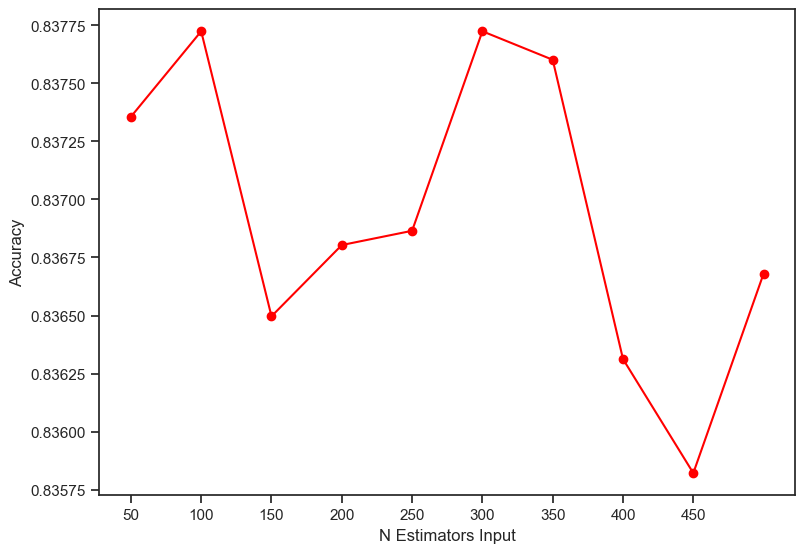

In [187]:
# Visualization of n estimators and accuracy
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, accuracy_results, marker='o', linestyle='-', label='Accuracy',color='red')
plt.xlabel('N Estimators Input')
plt.ylabel("Accuracy")
plt.xticks(range(50, 500, 50))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

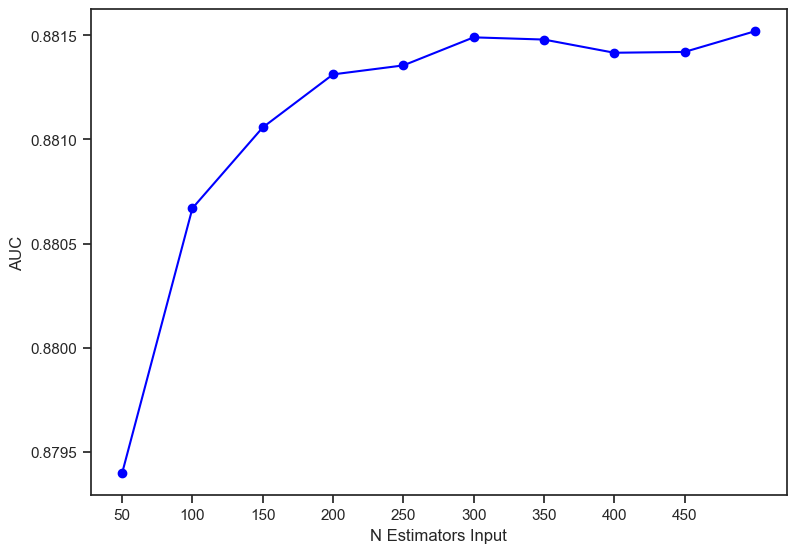

In [188]:
# Visualization of n estimators and AUC
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, auc_results, marker='o', linestyle='-', label='Accuracy',color='blue')
plt.xlabel('N Estimators Input')
plt.ylabel("AUC")
plt.xticks(range(50, 500, 50))
plt.show

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

In terms of accuracy there is no definitive trend as the graph hits peaks and valleys as the number of estimaors increases. However in the case of AUC, the value does steadily increase as there are more estimators, however, this should be treated with caution as to prevent overfitting of the training data with too many decision trees.

2. Is there an optimal value of the estimator within the given range?

Based on both graphs of AUC and accuracy, the optimal number of estimators would be 300 as this is the highest value for accuracy and amongst the highest values for AUC maximizing both correctedness of predictions and a balance between sensitivity and specificity.

# 4. Building AdaBoost, Gradient Boost, and XGB.

In [189]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

Adaboost

In [190]:
ada_n_estimators_results = []
ada_accuracy_results = []
ada_auc_results = []

for n in n_estimators_options:
    ada_model = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_model.fit(x_train, y_train)
    y_pred = ada_model.predict(x_test)
    y_prob = ada_model.predict_proba(x_test)[:, 1]
    
    ada_accuracy_results.append(accuracy_score(y_test, y_pred))
    ada_auc_results.append(roc_auc_score(y_test, y_prob))
    ada_n_estimators_results.append(n)

In [191]:
ada_results_df = pd.DataFrame({'n_estimators': ada_n_estimators_results, 'Accuracy': ada_accuracy_results, 'AUC': ada_auc_results})
print("AdaBoost Results")
print(ada_results_df)

AdaBoost Results
   n_estimators  Accuracy     AUC  
0        50      0.843990  0.897181
1       100      0.845096  0.897280
2       150      0.844788  0.897316
3       200      0.844911  0.897326
4       250      0.844788  0.897367
5       300      0.844788  0.897374
6       350      0.844788  0.897375
7       400      0.844788  0.897376
8       450      0.844788  0.897376
9       500      0.844788  0.897376


<function matplotlib.pyplot.show(close=None, block=None)>

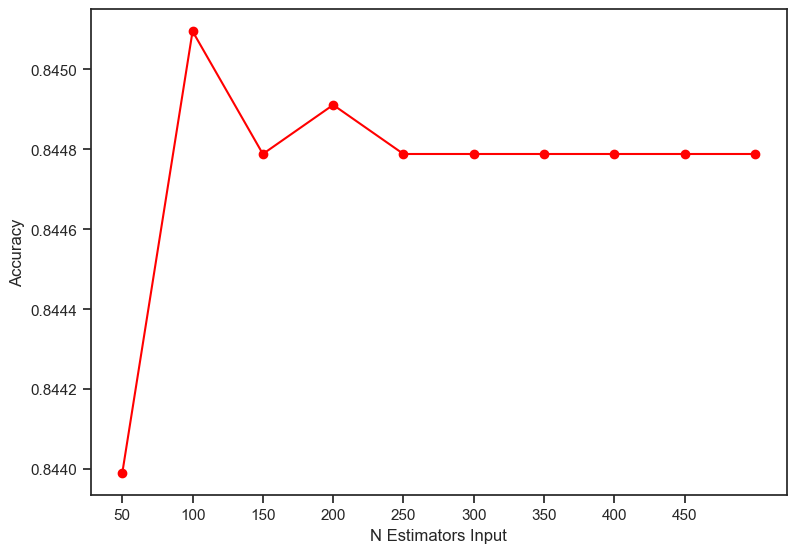

In [192]:
# Visualization of n estimators and accuracy
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, ada_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='red')
plt.xlabel('N Estimators Input')
plt.ylabel("Accuracy")
plt.xticks(range(50, 500, 50))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

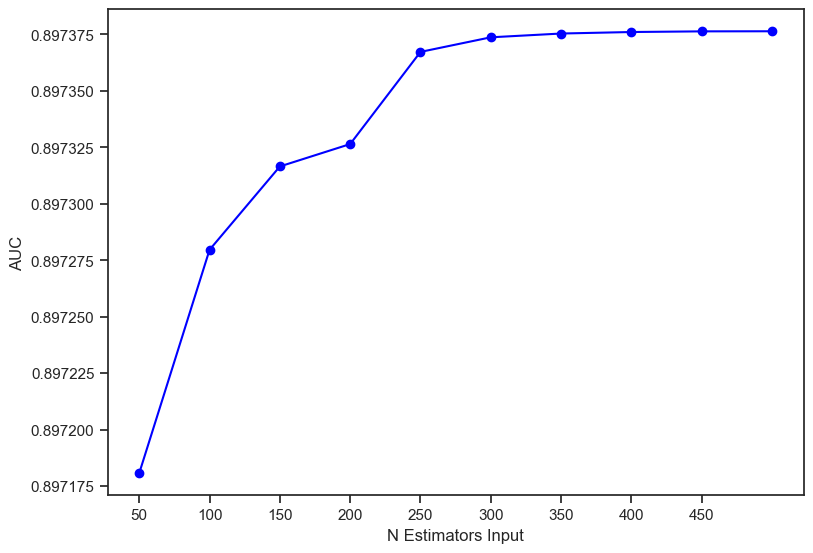

In [193]:
# Visualization of n estimators and AUC
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, ada_auc_results, marker='o', linestyle='-', label='Accuracy',color='blue')
plt.xlabel('N Estimators Input')
plt.ylabel("AUC")
plt.xticks(range(50, 500, 50))
plt.show

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

In terms of accuracy there is a sharp inclune after 50 estimators and then it stabilizes after 100 estimators and in terms of AUC it steadily inclines until 250 estimators and quickly stabilizes after.

2. Is there an optimal value of the estimator within the given range?

The optimal value of estimators in order to maximie both accuracy and AUC would be 250 estimators for an ada boosting model.

Gradient Boost

In [194]:
gb_n_estimators_results = []
gb_accuracy_results = []
gb_auc_results = []

for n in n_estimators_options:
    gb_model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gb_model.fit(x_train, y_train)
    y_pred = gb_model.predict(x_test)
    y_prob = gb_model.predict_proba(x_test)[:, 1]
    
    gb_accuracy_results.append(accuracy_score(y_test, y_pred))
    gb_auc_results.append(roc_auc_score(y_test, y_prob))
    gb_n_estimators_results.append(n)

In [195]:
gb_results_df = pd.DataFrame({'n_estimators': gb_n_estimators_results, 'Accuracy': gb_accuracy_results, 'AUC': gb_auc_results})
print("Gradient Boosting Results")
print(gb_results_df)

Gradient Boosting Results
   n_estimators  Accuracy     AUC  
0        50      0.847184  0.898424
1       100      0.846754  0.899189
2       150      0.846754  0.899059
3       200      0.846938  0.899113
4       250      0.846938  0.899140
5       300      0.847000  0.899077
6       350      0.846815  0.899105
7       400      0.847184  0.899071
8       450      0.846754  0.898987
9       500      0.846754  0.898925


<function matplotlib.pyplot.show(close=None, block=None)>

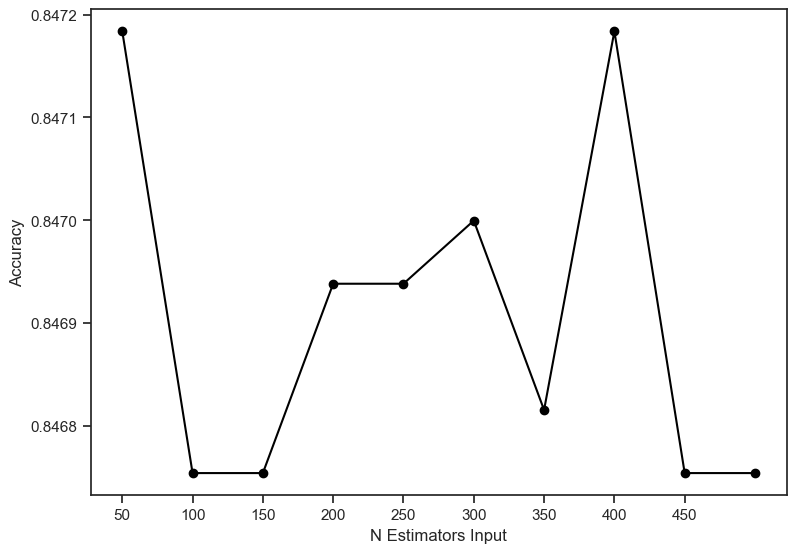

In [196]:
# Visualization of n estimators and accuracy
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, gb_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='black')
plt.xlabel('N Estimators Input')
plt.ylabel("Accuracy")
plt.xticks(range(50, 500, 50))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

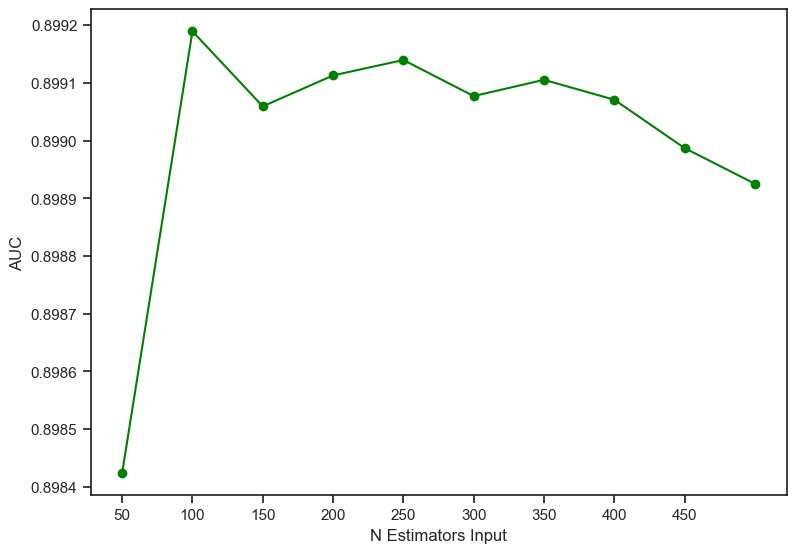

In [197]:
# Visualization of n estimators and AUC
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, gb_auc_results, marker='o', linestyle='-', label='Accuracy',color='green')
plt.xlabel('N Estimators Input')
plt.ylabel("AUC")
plt.xticks(range(50, 500, 50))
plt.show

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

The accuracy for a gradient boosting model is all over the place when there are changes in estimators showcasing high peaks and low valleys and in terms of AUC there is a sharp incline after 50 estimators and it stabilizes at 150 estimators.

2. Is there an optimal value of the estimator within the given range?

In order to maximize AUC and accuracy for a gradient boosting model the optimal value would be 400 estimators.

XGA

In [198]:
xgb_n_estimators_results = []
xgb_accuracy_results = []
xgb_auc_results = []

for n in n_estimators_options:
    xgb_model = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)
    y_prob = xgb_model.predict_proba(x_test)[:, 1]
    
    xgb_accuracy_results.append(accuracy_score(y_test, y_pred))
    xgb_auc_results.append(roc_auc_score(y_test, y_prob))
    xgb_n_estimators_results.append(n)

In [199]:
xgb_results_df = pd.DataFrame({'n_estimators': xgb_n_estimators_results, 'Accuracy': xgb_accuracy_results, 'AUC': xgb_auc_results})
print("XGBoost Results")
print(xgb_results_df)

XGBoost Results
   n_estimators  Accuracy     AUC  
0        50      0.845034  0.896967
1       100      0.844788  0.895420
2       150      0.843744  0.893847
3       200      0.843437  0.892974
4       250      0.842332  0.891857
5       300      0.841165  0.891036
6       350      0.840305  0.890372
7       400      0.840120  0.889799
8       450      0.839875  0.889435
9       500      0.839199  0.889068


<function matplotlib.pyplot.show(close=None, block=None)>

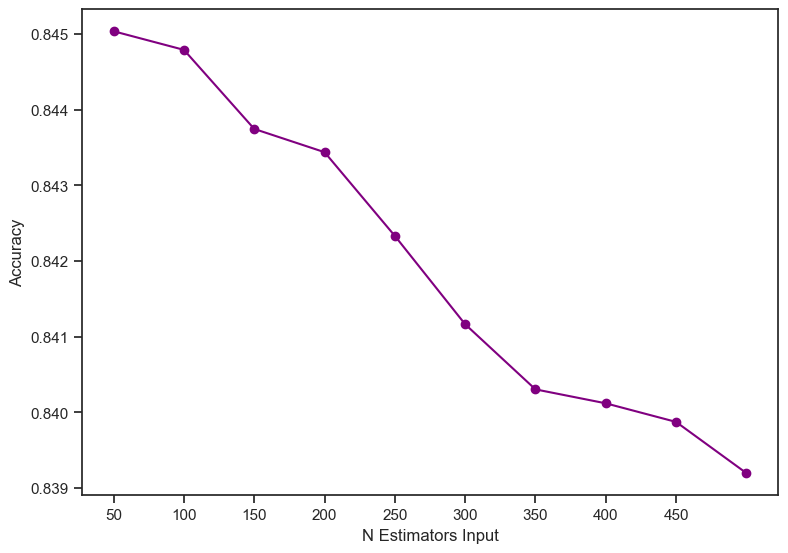

In [200]:
# Visualization of n estimators and accuracy
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, xgb_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='purple')
plt.xlabel('N Estimators Input')
plt.ylabel("Accuracy")
plt.xticks(range(50, 500, 50))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

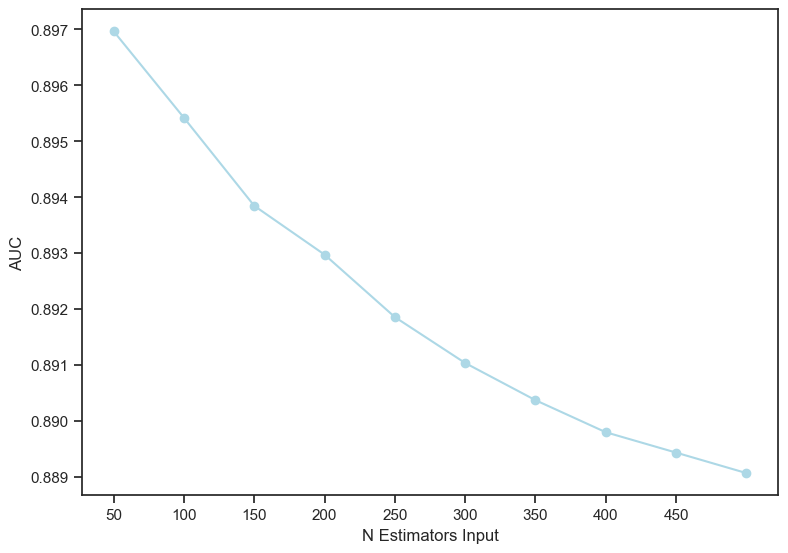

In [201]:
# Visualization of n estimators and AUC
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_options, xgb_auc_results, marker='o', linestyle='-', label='Accuracy',color='lightblue')
plt.xlabel('N Estimators Input')
plt.ylabel("AUC")
plt.xticks(range(50, 500, 50))
plt.show

1. Write your observations about the Classifier’s behavior with respect to the number of estimators

In terms of both accuracy and AUC for a XGB model there is a steady decline as the number of estimators increases.

2. Is there an optimal value of the estimator within the given range?

The optimal value to maximize AUC and accuracy would be 50 estimators.

# 5. Compare Performance

In [202]:
rf_optimized=results_df[results_df.n_estimators==300]

In [203]:
ada_optimized=ada_results_df[ada_results_df.n_estimators==250]

In [204]:
gb_optimized=gb_results_df[gb_results_df.n_estimators==400]

In [205]:
xgb_optimized=xgb_results_df[xgb_results_df.n_estimators==50]

In [206]:
compare_df=pd.concat([rf_optimized,ada_optimized,gb_optimized,xgb_optimized],keys=['Random Forest','Ada Boost','Gradient Boosting','XGB']).reset_index(level=0).rename(columns={'level_0': 'Model'})

In [207]:
compare_df = compare_df.transpose()
compare_df.columns = compare_df.iloc[0]
compare_df = compare_df[1:] 

In [208]:
compare_df

Model,Random Forest,Ada Boost,Gradient Boosting,XGB
n_estimators,300,250,400,50
Accuracy,0.837725,0.844788,0.847184,0.845034
AUC,0.88149,0.897367,0.899071,0.896967
